<h1>Reecomendador</h1>

Implementamos un recomendador de  repositorios github

Primero hacemos los imports de las librerias necesarias.

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn

Definimos las constantes

In [15]:
CSV_RATINGS_FILE = './data/ratings.csv'
CSV_REPOS_FILE = './data/repos.csv'
CSV_USERS_FILE = './data/users.csv'

N_FIRST_ROWS = 10

Cargamos los datos...

In [11]:
df_ratings = pd.read_csv(CSV_RATINGS_FILE)
df_repos = pd.read_csv(CSV_REPOS_FILE)
df_users = pd.read_csv(CSV_USERS_FILE)

Mostramos un resumen de las estadisticas y las N Primeras rows del dataset de ratings.

In [ ]:
df_ratings.describe()

,userId,repoId,rating
count,324.000000,324.000000,324.000000
mean,15.101852,76.543210,2.969136
std,8.968061,47.434896,1.893194
min,1.000000,1.000000,1.000000
25%,7.000000,34.000000,1.000000
50%,17.000000,78.000000,3.000000
75%,22.000000,114.000000,4.000000
max,30.000000,167.000000,8.000000


In [16]:
print(f"{df_ratings.head(N_FIRST_ROWS)}")

   userId  repoId  rating
0       1       1       2
1       1       2       3
2       1       3       4
3       1       4       5
4       1       5       3
5       1       6       1
6       1       7       5
7       1       8       1
8       1      80       5
9       1      10       4


Mostramos un resumen de las estadisticas y las N Primeras rows del dataset de repositorios.

In [17]:
df_repos.describe()

,repoId,stars
count,167.000000,117.000000
mean,83.988024,30383.102564
std,48.336669,39901.782214
min,1.000000,48.000000
25%,42.500000,5053.000000
50%,84.000000,18775.000000
75%,125.500000,42000.000000
max,167.000000,304196.000000


In [18]:
print(f"{df_repos.head(N_FIRST_ROWS)}")

   repoId                                    title  \
0       1                      airbnb / javascript   
1       2        kamranahmedse / developer-roadmap   
2       3                       microsoft / vscode   
3       4                         torvalds / linux   
4       5                    ytdl-org / youtube-dl   
5       6          30-seconds / 30-seconds-of-code   
6       7                          pallets / flask   
7       8                  chrislgarry / Apollo-11   
8       9  josephmisiti / awesome-machine-learning   
9      10                          django / django   

                                          categories    stars  
0                                          completar      NaN  
1        Roadmap to becoming a web developer in 2019  85800.0  
2                                 Visual Studio Code  80855.0  
3                           Linux kernel source tree  78761.0  
4  Command-line program to download videos from Y...  53909.0  
5                    

Mostramos un resumen de las estadisticas  y las N  primeras Rows del dataset users.csv

In [19]:
df_users.describe()

,userId
count,30.000000
mean,15.500000
std,8.803408
min,1.000000
25%,8.250000
50%,15.500000
75%,22.750000
max,30.000000


In [20]:
print(f"{df_users.head(N_FIRST_ROWS)}")

   userId      username                   name
0       1      iris9112   Isabel Ruiz Buriticá
1       2   dianaclarke                  Diana
2       3   nateprewitt           Nate Prewitt
3       4        oldani        Ordanis Sanchez
4       5    waflessnet             waflessnet
5       6     luisbalru     Luis Balderas Ruiz
6       7       elswork                elswork
7       8        l3s777                 l3s777
8       9  camiloyate09            Camilo Yate
9      10        josmig  José Miguel Pantigoso


Sacamos el número de usuarios y el numeo de ratings.

In [21]:
n_users =  df_ratings.userId.unique().shape[0]
n_ratings = df_ratings.repoId.unique().shape[0]
print(f"Número de usuarios únicos: {n_users}")
print(f"Número de ratings: {n_ratings}")

Número de usuarios únicos: 30
Número de ratings: 167


Revisamos el histograma de las puntuaciones

(array([94., 62., 66., 28., 40., 12., 14.,  8.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <BarContainer object of 8 artists>)

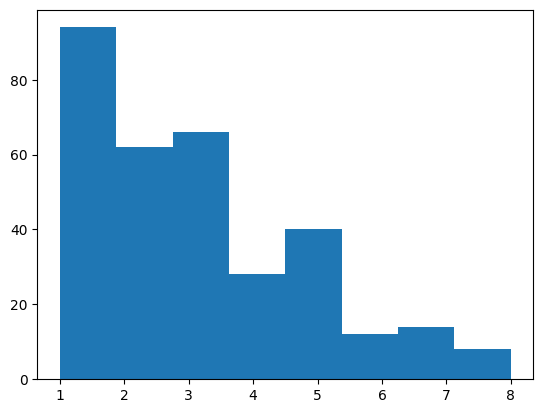

In [24]:
plt.hist(df_ratings.rating, bins = 8)